## **Regressão Logística no conjunto de dados de dígitos**

**Carregando os Dados**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# Mostra que existem 1797 imagens (8 por 8 imagens para uma dimensionalidade de 64)
print("Image Data shape", digits.data.shape)
# Mostra que há 1797 rótulos ( inteiros de 0 a 9)
print("Label Data Shape", digits.target.shape)

Image Data shape (1797, 64)
Label Data Shape (1797,)


**Mostrando as imagens e rótulos (conjunto de dados e dígitos)**

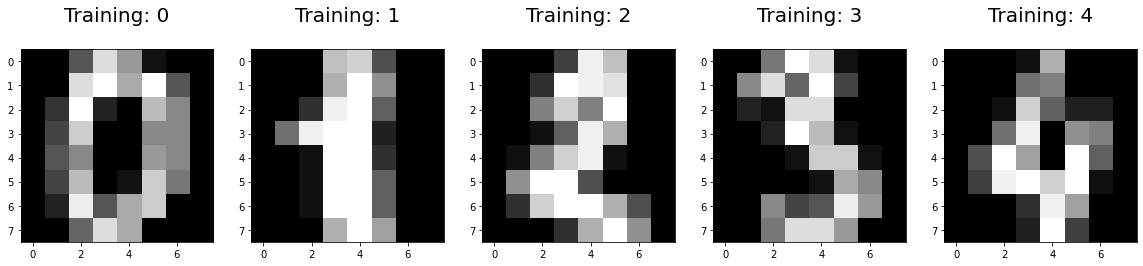

In [ ]:
# Esta seçao é apenas para mostrar o tipo de imagens e rótulos. Isso ajuda na visualização dos dados e mostra com o que estamos trabalhando
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize = (20,4))
for index, (image, label) in enumerate (zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

**Dividindo os dados em conjuntos de treino e teste(cojuntos de dígitos)**

*A criação de conjuntos de treino e teste possibilitam que o treinamento do modelo de classificação generalize bem quando trabalhar com outros dados*

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

**Padrão de modelagem de 4 etapas Scikit-learn (conjunto de dados de dígitos)**

In [ ]:
# Passo 1 - Importanto o modelo que iremos usar
from sklearn.linear_model import LogisticRegression

In [ ]:
# Passo 2 - Instanciando o modelo
# Todos os parâmetros não especificados são definidos por default
logisticRegr = LogisticRegression()


In [ ]:
# Passo 3 - Treinar o modelo nos dados, armazenando as informações aprendidas com os dados
# O modelo está aprendendo a relaçao entre 'x_train' e os rótulos de 'y_train
logisticRegr.fit(x_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Passo 4 - Prever rótulos para novos dados (novas imagens) usando as informações que o madelo aprendeu durante o processo de treinamento
# Retorna um array numpy 
# Predict para uma observação (imagem)
logisticRegr.predict(x_test [0].reshape(1, -1))

array([2])

In [ ]:
# Prevendo múltiplas observações (imagens) de uma só vez
logisticRegr.predict(x_test [0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
# Fazendo previsões em todos os dados de teste
predictions = logisticRegr.predict(x_test)

**Medindo o desempenho do modelo (conjunto de dados de dígitos)**

*Embora existam outras maneiras de medir o desempenho do modelo (precisão, recall, pontuação F1, curva ROC , etc), vamos manter isso simples e usar a precisão como nossa métrica.
Para fazer isso, veremos o desempenho do modelo nos novos dados (conjunto de teste)
a precisão é definida como:
(fração de previsões corretas): previsões corretas / número total de pontos de dados*

In [ ]:
# Usando o método de score para obter a precisão/acurácia do modelo
score = logisticRegr.score(x_test, y_test)
print (score)

0.9511111111111111


**Matriz de Confusão (conjuto de dados de dígitos)**

*Uma matriz de confusão é uma tabela frequentemente usada para descrever o desempenho de um modelo de classificação (ou “classificador”) em um conjunto de dados de teste para os quais os verdadeiros valores são conhecidos. Nesta seção,são mostrados apenas dois pacotes python (Seaborn e Matplotlib) para tornar as matrizes de confusão mais compreensíveis e visualmente atraentes.*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics

*A matriz de confusão abaixo não é visualmente super informativa ou visualmente atraente.*

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


**Método 1 (Seaborn)**

*Esse método produz uma matriz de confusão mais compreensível e visualmente legível usando o seaborn .*

Text(0.5, 1.0, 'Accuracy Score: 0.9511111111111111')

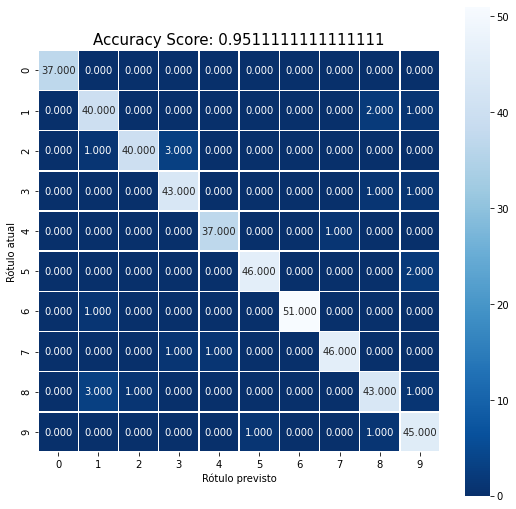

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Rótulo atual');
plt.xlabel('Rótulo previsto');
all_sample_title = 'Accuracy Score: {0}'. format(score)
plt.title(all_sample_title, size = 15)

**Método 2 (Matplotlib)**

*O método 2 é para mostrar que pode ser feito o passo anterior como Matplotlib, no entanto a quantidade de código é maior*

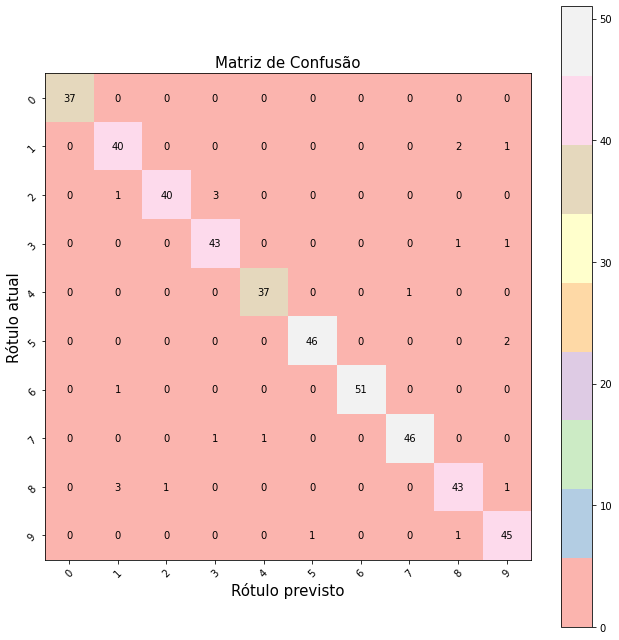

In [120]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Matriz de Confusão', size=15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size=10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size=10)
plt.tight_layout()
plt.ylabel('Rótulo atual', size=15)
plt.xlabel('Rótulo previsto', size = 15)
width, height = cm.shape

for x in range (width):
    for y in range (height):
      plt.annotate(str(cm[x][y]), xy=(y, x),
      horizontalalignment='center',
      verticalalignment='center') 

## **Regressão Logística (conjunto de dados MNIST_784)**

*O dataset MNIST não vem com o scikit-lean, portanto é necessário importar do fetch_openml* 

In [ ]:
# Carregando o conjunto de dados
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
# Exibindo imagens
# Existem 70.000 imagens(28 por 28 imagens para uma dimensionalidade de 784)
print(mnist.data.shape)

(70000, 784)


In [ ]:
# Exibindo as etiquetas
print(mnist.target.shape)

(70000,)


## **Dividindo o dataset (MNIST_784) em conjunto de treino e teste**

In [ ]:
# Esse test_size=1/7.0 cria o tamanho do conjunto de treinamento de 60.000 imagens e o tamanho do conjunto de teste de 10.000.
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
mnist.data, mnist.target, test_size = 1/7.0, random_state = 0)

**Exibindo imagens e rótulos (MNIST_874)**

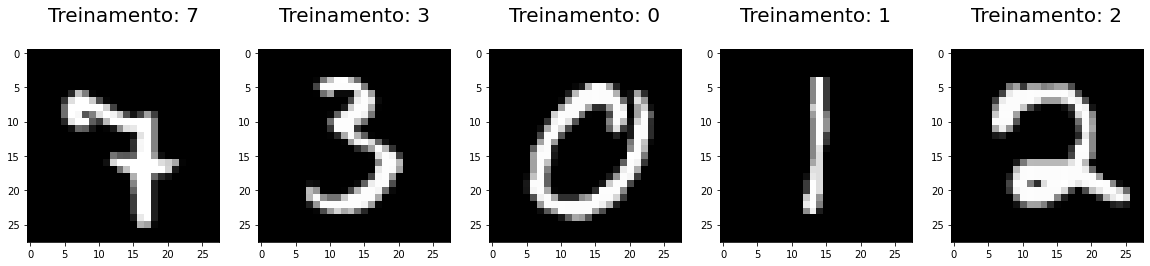

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate (zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Treinamento: %s\n' % label, fontsize = 20)

**Padrão de modelagem de 4 etapas Scikit-learn (MNIST_784)**

In [ ]:
# Passo 1 - Importanto o modelo que queremos usar
# No sklearn, todos os modelos de aprendizado de máquina são implementados como classes Python
from sklearn.linear_model import LogisticRegression

In [ ]:
# Passo 2 - Instanciando o modelo 
logisticRegr = LogisticRegression (solver = 'lbfgs')

In [ ]:
# Passo 3 - Treinando o modelo nos dados, armazenando as informações aprendidas com eles
# O modelo está aprendendo a realação entre x(dígitos) e y(rótulos)
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Passo 4 - prevendo rótulos de novos dados (novas imagens) usando as informações que o modelo aprendeu durante o processo de treinamento do modelo
# Retorna uma matriz Numpy
# Predição para uma observação (uma imagem)
logisticRegr.predict(test_img[0].reshape(1,-1)) 

array(['0'], dtype=object)

In [ ]:
# Predição para múltiplas observações (várias imagens) de uma vez
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
# 